# X-LoVoCCS Gas Mass Relations

In this notebook we relate the hot (i.e. X-ray emitting) gas masses measured for the LoVoCCS sample to other properties.

## Import Statements

In [1]:
import xga
# This is a bodge that will only work because xga_output in notebooks has already been defined, XGA
#  will be made to handle this more gracefully at some point
temp_dir = xga.OUTPUT
actual_dir = temp_dir.split('notebooks/')[0]+'notebooks/xga_output/'
xga.OUTPUT = actual_dir
xga.utils.OUTPUT = actual_dir
from xga.relations.fit import scaling_relation_lira
from xga import DEFAULT_COSMO

from astropy.units import Quantity, def_unit
import pandas as pd
import numpy as np
import os

## Creating Storage Directories

We ensure that the storage directory within which we will store the gas mass relations generated in this notebook exists - as well as the one where we store the figure we make for the scaling relations:

In [2]:
if not os.path.exists('../../outputs/scaling_relations/gmass/'):
    os.makedirs('../../outputs/scaling_relations/gmass/')
stor_pth = '../../outputs/scaling_relations/gmass/'

if not os.path.exists('../../outputs/figures/scaling_relations/gmass'):
    os.makedirs('../../outputs/figures/scaling_relations/gmass/')
fig_pth = '../../outputs/figures/scaling_relations/gmass/'

## Loading results

We load the results of the XGA-LTR run that allowed the metallicity to vary freely:

In [3]:
res500_metfree = pd.read_csv('../../outputs/results/ltr_r500_metfree_pipeline_results.csv')
res500_metfree.head(5)

,name,ra,dec,redshift,r500,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,Lx500_0.5-2.0-,...,Lx500ce_0.5-2.0+,Lx500ce_0.01-100.0,Lx500ce_0.01-100.0-,Lx500ce_0.01-100.0+,Lx500ce_0.4-2.4,Lx500ce_0.4-2.4-,Lx500ce_0.4-2.4+,Zmet500ce,Zmet500ce-,Zmet500ce+
0,LoVoCCS-1,227.734300,5.745471,0.0766,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LoVoCCS-2,44.740000,13.580000,0.0739,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LoVoCCS-4A,10.458750,-9.301944,0.0555,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LoVoCCS-4B,10.451487,-9.460007,0.0555,1144.764889,5.55319,0.049256,0.049231,6.827098e+43,2.376048e+42,...,2.262334e+42,1.917376e+44,5.887959e+42,5.199501e+42,7.148396e+43,2.249453e+42,2.175760e+42,0.214844,0.013891,0.013947
4,LoVoCCS-5,303.157313,-56.845978,0.0556,1119.049232,5.35600,0.044514,0.044392,1.603958e+44,7.309935e+42,...,8.983429e+42,3.665132e+44,2.810300e+43,1.507589e+43,1.405310e+44,1.059858e+43,8.959700e+42,0.178768,0.014775,0.014669


We also separately load the gas mass measurements:

In [4]:
gmass500 = pd.read_csv("../../outputs/results/ltr_r500_gas_masses.csv")
gmass500.head(5)

,name,gm500,gm500-,gm500+
0,LoVoCCS-0,3.309946,0.000823,0.000806
1,LoVoCCS-3,4.313099,0.001539,0.001577
2,LoVoCCS-6,6.327302,0.008326,0.007914
3,LoVoCCS-7,6.344471,0.006444,0.007227
4,LoVoCCS-8,5.380971,0.002314,0.002345


The two tables are joined to make everything downstream easier:

In [5]:
res = pd.merge(res500_metfree, gmass500, on='name')
res.head(5)

,name,ra,dec,redshift,r500,Tx500,Tx500-,Tx500+,Lx500_0.5-2.0,Lx500_0.5-2.0-,...,Lx500ce_0.01-100.0+,Lx500ce_0.4-2.4,Lx500ce_0.4-2.4-,Lx500ce_0.4-2.4+,Zmet500ce,Zmet500ce-,Zmet500ce+,gm500,gm500-,gm500+
0,LoVoCCS-7,330.48000,-59.950000,0.0980,1149.344414,5.88148,0.063561,0.063588,3.036659e+44,1.317301e+42,...,5.090248e+42,2.590291e+44,1.123953e+42,1.297618e+42,0.198697,0.020727,0.020960,6.344471,0.006444,0.007227
1,LoVoCCS-10,194.84000,-4.190000,0.0845,1129.503907,5.57022,0.089904,0.089403,3.010015e+44,1.873288e+42,...,9.161462e+42,2.411354e+44,2.040795e+42,1.746662e+42,0.172765,0.036947,0.037878,4.485276,0.006664,0.006564
2,LoVoCCS-13,49.49000,-44.240000,0.0752,944.951945,4.04929,0.010001,0.008223,2.487713e+44,2.572661e+41,...,1.409299e+42,1.461498e+44,3.803062e+41,3.996260e+41,0.186252,0.006083,0.006151,3.148795,0.000657,0.000672
3,LoVoCCS-15,351.33000,-12.130000,0.0852,892.237349,3.69158,0.009654,0.009652,2.497428e+44,5.977186e+41,...,1.459729e+42,1.274050e+44,4.665354e+41,5.780774e+41,0.169150,0.006380,0.006480,1.414387,0.000791,0.000775
4,LoVoCCS-18,194.67125,-1.756944,0.0845,1043.615449,4.88707,0.035615,0.036800,2.626842e+44,6.617313e+41,...,3.025418e+42,2.040632e+44,6.994546e+41,6.546816e+41,0.123906,0.013860,0.014070,4.563528,0.004117,0.004186


## Setting up for scaling relation fits

We set up normalisations for the fits we're going to perform:

In [6]:
gmass_norm = Quantity(1e+13, 'Msun')
tx_norm = Quantity(4, 'keV')
lx52_norm = Quantity(1e+44, 'erg/s')

The names and redshifts of the clusters are read out - we will pass them into the scaling relations so that the data points can easily be coloured by redshift, and we can link particular data points to a particular galaxy cluster more easily:

In [7]:
names = res['name'].values
zs = res['redshift'].values

We make use of the default cosmology defined in XGA, which is a concordance $\Lambda$CDM model:

In [8]:
DEFAULT_COSMO

LambdaCDM(H0=70 km / (Mpc s), Om0=0.3, Ode0=0.7, Tcmb0=0 K, Neff=3.04, m_nu=None, Ob0=None)

We use the cosmology to calculate $E(z)$, which will be multiplied with our gas masses before the temperature scaling relations are created:

In [9]:
# Need this for the temperature relations
e_val = DEFAULT_COSMO.efunc(zs)

# We need this for the luminosity relations
e_val_sq = DEFAULT_COSMO.efunc(zs)**2

## Fitting with LIRA

We make use of the LIRA fitting package <font color='red'>(need to make sure to add reference/link)</font> to generate our scaling relations. This is a fitting package for scaling relations that is implemented in R, so we utilise an XGA LIRA interface, which also stores outputs in ScalingRelation product objects, which have some very useful features.

### $M^{\rm{gas}}_{500}$-$T_{\rm{X,500}}$

First, we plot gas masses measured within $R_{500}$ against temperature:

In [10]:
gmass = Quantity(res[['gm500', 'gm500-', 'gm500+']].values*1e+13, 'Msun')*e_val[..., None]
tx = Quantity(res[['Tx500', 'Tx500-', 'Tx500+']].values, 'keV')

gmass_tx_r500 = scaling_relation_lira(gmass[:, 0], gmass[:, 1:], tx[:, 0], tx[:, 1:], gmass_norm, tx_norm, 
                                      y_name=r'$E(z)$$M^{\rm{gas}}_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500}}$', 
                                      dim_hubb_ind=1, point_names=names, third_dim_info=zs, 
                                      third_dim_name='Redshift')
gmass_tx_r500.author = "Turner et al."
gmass_tx_r500.model_colour = "tab:cyan"
gmass_tx_r500.name = r"X-LoVoCCS $R_{500}$"
gmass_tx_r500.save(stor_pth + "gmass_tx_r500.xgarel")

/opt/anaconda3/envs/xga_env/lib/python3.8/site-packages/xga/relations/fit.py:83: UserWarning: 1 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))
R[write to console]: module mix loaded



  |**************************************************| 100%


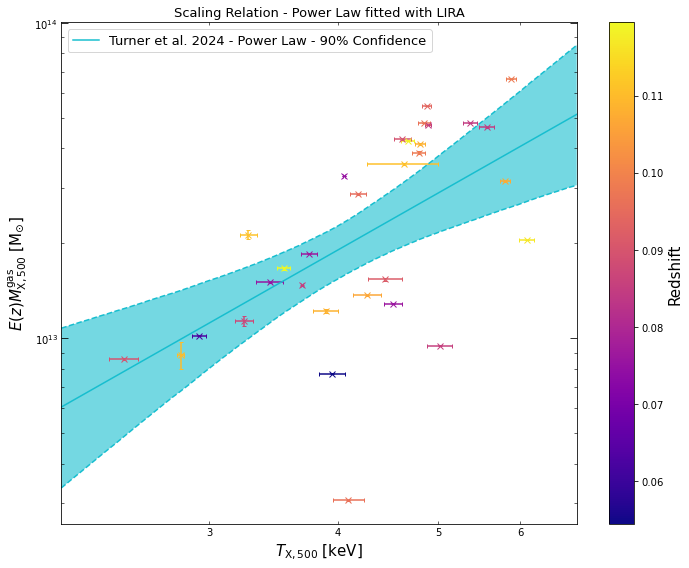

In [11]:
gmass_tx_r500.view(label_points=False, save_path=fig_pth+"gmass_tx_r500.pdf")

Removed no burn in


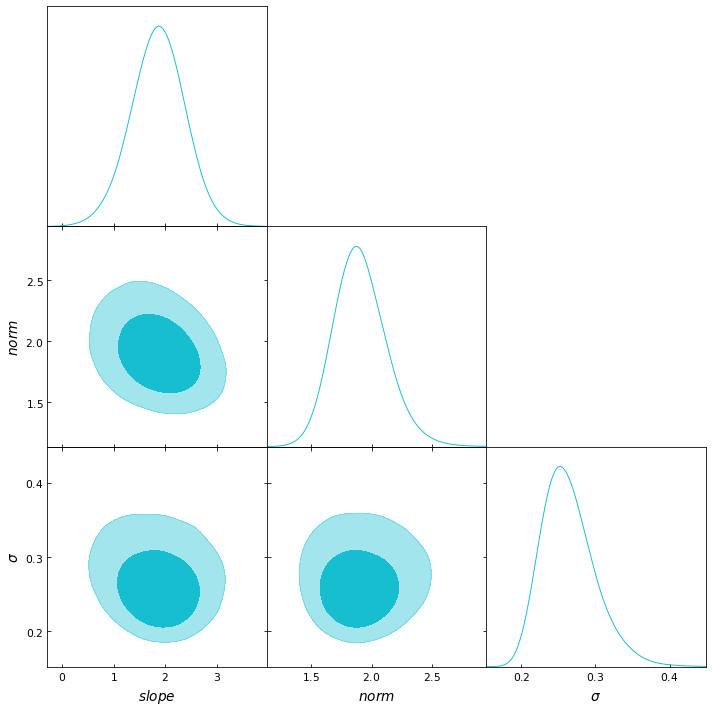

In [12]:
gmass_tx_r500.view_corner()

### $M^{\rm{gas}}_{500}$-$T_{\rm{X,500ce}}$ 

Now we plot gas masses measured within $R_{500}$ against temperature measured within $R_{500ce}$:

In [13]:
gmass = Quantity(res[['gm500', 'gm500-', 'gm500+']].values*1e+13, 'Msun')*e_val[..., None]
txce = Quantity(res[['Tx500ce', 'Tx500ce-', 'Tx500ce+']].values, 'keV')

gmass_tx_r500ce = scaling_relation_lira(gmass[:, 0], gmass[:, 1:], txce[:, 0], txce[:, 1:], gmass_norm, tx_norm, 
                                        y_name=r'$E(z)$$M^{\rm{gas}}_{\rm{X,500}}$', x_name=r'$T_{\rm{X,500ce}}$', 
                                        dim_hubb_ind=1, point_names=names, third_dim_info=zs, 
                                        third_dim_name='Redshift')
gmass_tx_r500ce.author = "Turner et al."
gmass_tx_r500ce.model_colour = "firebrick"
gmass_tx_r500ce.name = r"X-LoVoCCS $R_{500ce}$"
gmass_tx_r500ce.save(stor_pth + "gmass_tx_r500ce.xgarel")

/opt/anaconda3/envs/xga_env/lib/python3.8/site-packages/xga/relations/fit.py:83: UserWarning: 1 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


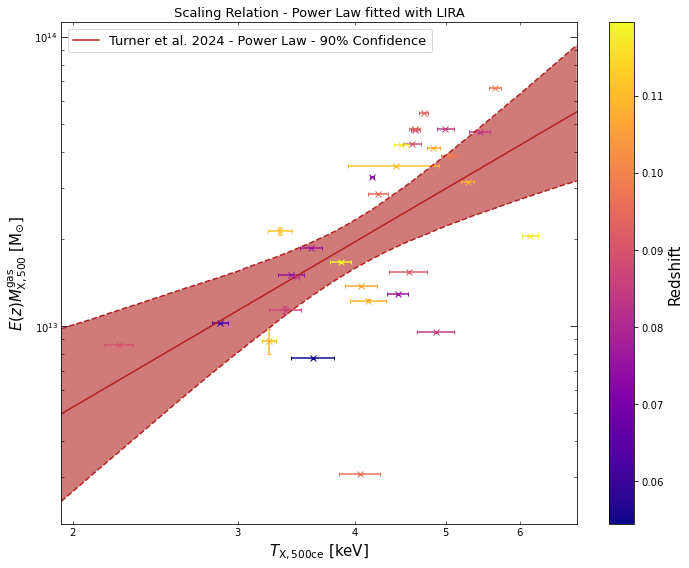

In [14]:
gmass_tx_r500ce.view(label_points=False, save_path=fig_pth+"gmass_tx_r500ce.pdf")

Removed no burn in


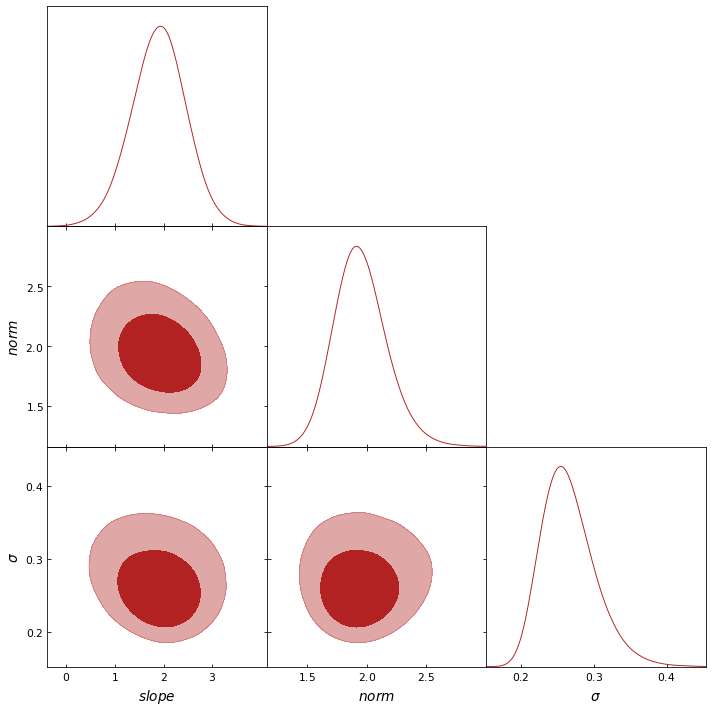

In [15]:
gmass_tx_r500ce.view_corner()

### $L^{0.5-2.0}_{\rm{X,500}}$-$M^{\rm{gas}}_{500}$

We also measure a scaling relation between soft-band luminosity and the gas mass:

In [16]:
lx = Quantity(res[['Lx500_0.5-2.0', 'Lx500_0.5-2.0-', 'Lx500_0.5-2.0+']].values, 'erg/s')*e_val_sq[..., None]
gmass = Quantity(res[['gm500', 'gm500-', 'gm500+']].values*1e+13, 'Msun')

lx52_gmass_r500 = scaling_relation_lira(lx[:, 0], lx[:, 1:], gmass[:, 0], gmass[:, 1:], lx52_norm, gmass_norm, 
                                        y_name=r'$E(z)^{2}$$L^{\rm{0.5-2.0}}_{\rm{X,500}}$', 
                                        x_name=r'$M^{\rm{gas}}_{\rm{X,500}}$', 
                                        dim_hubb_ind=2, point_names=names, third_dim_info=zs, 
                                        third_dim_name='Redshift')
lx52_gmass_r500.author = "Turner et al."
lx52_gmass_r500.model_colour = "goldenrod"
lx52_gmass_r500.name = r"X-LoVoCCS $R_{500}$"
lx52_gmass_r500.save(stor_pth + "lx52_gmass_r500.xgarel")

/opt/anaconda3/envs/xga_env/lib/python3.8/site-packages/xga/relations/fit.py:83: UserWarning: 1 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


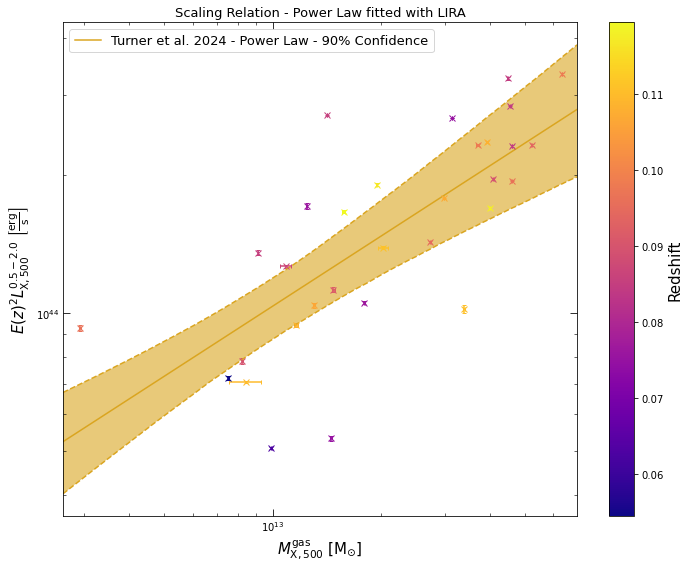

In [17]:
lx52_gmass_r500.view(label_points=False, save_path=fig_pth+"lx52_gmass_r500.pdf")

Removed no burn in


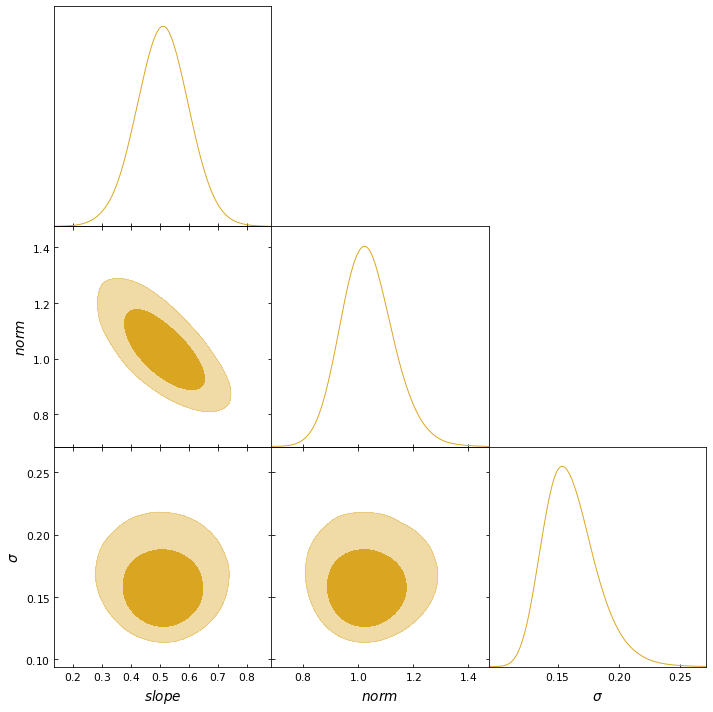

In [18]:
lx52_gmass_r500.view_corner()

### $L^{0.5-2.0}_{\rm{X,500ce}}$-$M^{\rm{gas}}_{500}$

Another relation with luminosity is created, this time with the core-excised luminosity:

In [19]:
lx = Quantity(res[['Lx500ce_0.5-2.0', 'Lx500ce_0.5-2.0-', 'Lx500ce_0.5-2.0+']].values, 'erg/s')*e_val_sq[..., None]
gmass = Quantity(res[['gm500', 'gm500-', 'gm500+']].values*1e+13, 'Msun')

lx52_gmass_r500ce = scaling_relation_lira(lx[:, 0], lx[:, 1:], gmass[:, 0], gmass[:, 1:], lx52_norm, gmass_norm, 
                                          y_name=r'$E(z)^{2}$$L^{\rm{0.5-2.0}}_{\rm{X,500ce}}$', 
                                          x_name=r'$M^{\rm{gas}}_{\rm{X,500}}$', 
                                          dim_hubb_ind=2, point_names=names, third_dim_info=zs, 
                                          third_dim_name='Redshift')
lx52_gmass_r500ce.author = "Turner et al."
lx52_gmass_r500ce.model_colour = "indigo"
lx52_gmass_r500ce.name = r"X-LoVoCCS $R_{500ce}$"
lx52_gmass_r500ce.save(stor_pth + "lx52_gmass_r500ce.xgarel")

/opt/anaconda3/envs/xga_env/lib/python3.8/site-packages/xga/relations/fit.py:83: UserWarning: 1 sources have NaN values and have been excluded
  warn("{} sources have NaN values and have been excluded".format(thrown_away))


  |**************************************************| 100%


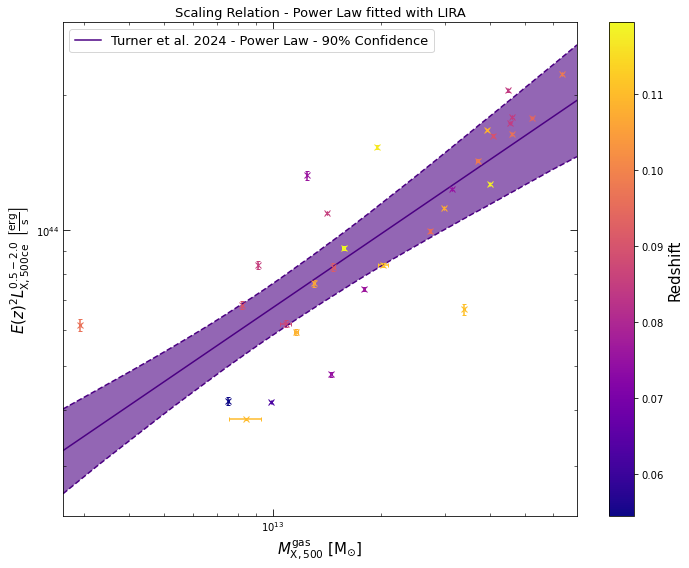

In [20]:
lx52_gmass_r500ce.view(label_points=False, save_path=fig_pth+"lx52_gmass_r500ce.pdf")

Removed no burn in


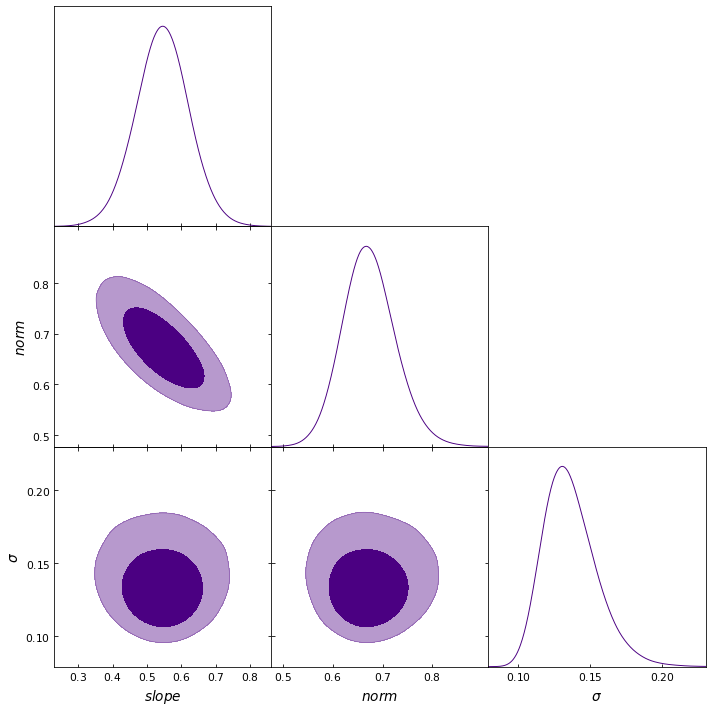

In [21]:
lx52_gmass_r500ce.view_corner()